<a href="https://colab.research.google.com/github/AnotherLyat/Basic-AI/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")
sns.set()
mvs = pd.read_excel('movies_metadata.xlsx')

In [2]:
#Excluindo colunas que não serão utilizadas
mvs.drop('belongs_to_collection', axis = 1, inplace = True)
mvs.drop('homepage', axis = 1, inplace = True)
mvs.drop('original_language', axis = 1, inplace = True)
mvs.drop('original_title', axis = 1, inplace = True)
mvs.drop('overview', axis = 1, inplace = True)
mvs.drop('poster_path', axis = 1, inplace = True)
mvs.drop('tagline', axis = 1, inplace = True)
mvs.drop('video', axis = 1, inplace = True)
mvs.drop('spoken_languages', axis = 1, inplace = True)
mvs.drop('production_companies', axis = 1, inplace = True)
mvs.drop('production_countries', axis = 1, inplace = True)
mvs.drop('adult', axis = 1, inplace = True)
mvs.drop('status', axis = 1, inplace = True)
mvs.drop('budget', axis = 1, inplace = True)


mvs.head()

,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count
0,16 35 10751,862.0,tt0114709,21946943.0,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0
1,12 14 10751,8844.0,tt0113497,17015539.0,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0
2,10749 35,15602.0,tt0113228,11712.0,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0
3,35 18 10749,31357.0,tt0114885,3859495.0,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0
4,35,11862.0,tt0113041,8387519.0,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0


In [3]:
mvs['genres']= mvs["genres"].str.split(" ", expand = False)
mvs.isna().sum()
mvs = mvs.dropna()

In [4]:
Animation=[] #Animation, Comedy, Family, Adventure, Fantasy, Romance, Drama, Action, Crime, Thriller, Horror, History, Sci_Fi, Mystery, War, Foreign, Music, Documentary, Western, TVMovie
Comedy=[]
Family=[]
Adventure=[]
Fantasy=[]
Romance=[]
Drama=[]
Action=[]
Crime=[]
Thriller=[]
Horror=[]
History=[]
Sci_Fi=[]
Mystery=[]
War=[]
Foreign=[]
Music=[]
Documentary=[]
Western=[]
TVMovie=[]

for x in mvs['genres']: 
  if 'Animation' in x:
    Animation.append(1)
  else:
    Animation.append(0)

  if 'Comedy' in x:
    Comedy.append(1)
  else:
    Comedy.append(0)

  if 'Family' in x:
    Family.append(1)
  else:
    Family.append(0)

  if 'Adventure' in x:
    Adventure.append(1)
  else:
    Adventure.append(0)

  if 'Fantasy' in x:
    Fantasy.append(1)
  else:
    Fantasy.append(0)

  if 'Romance' in x:
    Romance.append(1)
  else:
    Romance.append(0)

  if 'Drama' in x:
    Drama.append(1)
  else:
    Drama.append(0)

  if 'Action' in x:
    Action.append(1)
  else:
    Action.append(0)

  if 'Crime' in x:
    Crime.append(1)
  else:
    Crime.append(0)

  if 'Thriller' in x:
    Thriller.append(1)
  else:
    Thriller.append(0)

  if 'Horror' in x:
    Horror.append(1)
  else:
    Horror.append(0)

  if 'History' in x:
    History.append(1)
  else:
    History.append(0)

  if 'Sci-Fi' in x:
    Sci_Fi.append(1)
  else:
    Sci_Fi.append(0)

  if 'Mystery' in x:
    Mystery.append(1)
  else:
    Mystery.append(0)

  if 'War' in x:
    War.append(1)
  else:
    War.append(0)

  if 'Foreign' in x:
    Foreign.append(1)
  else:
    Foreign.append(0)

  if 'Music' in x:
    Music.append(1)
  else:
    Music.append(0)

  if 'Documentary' in x:
    Documentary.append(1)
  else:
    Documentary.append(0)

  if 'Western' in x:
    Western.append(1)
  else:
    Western.append(0)

  if 'TVMovie' in x:
    TVMovie.append(1)
  else:
    TVMovie.append(0)

mvs.insert(10,'Animation', Animation)
mvs.insert(11,'Comedy', Comedy)
mvs.insert(12,'Family', Family)
mvs.insert(13,'Adventure', Adventure)
mvs.insert(14,'Fantasy', Fantasy)
mvs.insert(15,'Romance', Romance)
mvs.insert(16,'Drama', Drama)
mvs.insert(17,'Action', Action)
mvs.insert(18,'Crime', Crime)
mvs.insert(19,'Thriller', Thriller)
mvs.insert(20,'Horror', Horror)
mvs.insert(21,'History', History)
mvs.insert(22,'Sci-Fi', Sci_Fi)
mvs.insert(23,'Mystery', Mystery)
mvs.insert(24,'War', War)
mvs.insert(25,'Foreign', Foreign)
mvs.insert(26,'Music', Music)
mvs.insert(27,'Documentary', Documentary)
mvs.insert(28,'Western', Western)
mvs.insert(29,'TV Movie', TVMovie)
mvs

,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,...,Horror,History,Sci-Fi,Mystery,War,Foreign,Music,Documentary,Western,TV Movie
0,"[16, 35, 10751]",862.0,tt0114709,21946943.0,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,...,0,0,0,0,0,0,0,0,0,0
1,"[12, 14, 10751]",8844.0,tt0113497,17015539.0,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,...,0,0,0,0,0,0,0,0,0,0
2,"[10749, 35]",15602.0,tt0113228,11712.0,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,...,0,0,0,0,0,0,0,0,0,0
3,"[35, 18, 10749]",31357.0,tt0114885,3859495.0,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,...,0,0,0,0,0,0,0,0,0,0
4,[35],11862.0,tt0113041,8387519.0,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,"[28, 35]",14475.0,tt0081698,6963023.0,1980-07-11,11715321.0,113.0,Used Cars,6.3,71.0,...,0,0,0,0,0,0,0,0,0,0
4995,"[53, 27, 10749, 878]",43715.0,tt0050294,1738062.0,1957-05-01,0.0,79.0,The Deadly Mantis,5.3,16.0,...,0,0,0,0,0,0,0,0,0,0
4996,[18],10052.0,tt0259288,4924078.0,2002-02-22,52322400.0,104.0,Dragonfly,6.2,209.0,...,0,0,0,0,0,0,0,0,0,0
4997,"[18, 14, 27]",11979.0,tt0238546,8436243.0,2002-02-10,45479110.0,101.0,Queen of the Damned,5.5,247.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mvs.loc[mvs['popularity'] >= 8778414, 'popularityb'] = 1
mvs.loc[mvs['popularity'] < 8778414, 'popularityb'] = 0
mvs.loc[mvs['revenue'] >= 82949672, 'revenueb'] = 1
mvs.loc[mvs['revenue'] < 82949672, 'revenueb'] = 0
mvs

,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,...,Sci-Fi,Mystery,War,Foreign,Music,Documentary,Western,TV Movie,popularityb,revenueb
0,"[16, 35, 10751]",862.0,tt0114709,21946943.0,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,...,0,0,0,0,0,0,0,0,1.0,1.0
1,"[12, 14, 10751]",8844.0,tt0113497,17015539.0,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,...,0,0,0,0,0,0,0,0,1.0,1.0
2,"[10749, 35]",15602.0,tt0113228,11712.0,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,"[35, 18, 10749]",31357.0,tt0114885,3859495.0,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,...,0,0,0,0,0,0,0,0,0.0,0.0
4,[35],11862.0,tt0113041,8387519.0,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,"[28, 35]",14475.0,tt0081698,6963023.0,1980-07-11,11715321.0,113.0,Used Cars,6.3,71.0,...,0,0,0,0,0,0,0,0,0.0,0.0
4995,"[53, 27, 10749, 878]",43715.0,tt0050294,1738062.0,1957-05-01,0.0,79.0,The Deadly Mantis,5.3,16.0,...,0,0,0,0,0,0,0,0,0.0,0.0
4996,[18],10052.0,tt0259288,4924078.0,2002-02-22,52322400.0,104.0,Dragonfly,6.2,209.0,...,0,0,0,0,0,0,0,0,0.0,0.0
4997,"[18, 14, 27]",11979.0,tt0238546,8436243.0,2002-02-10,45479110.0,101.0,Queen of the Damned,5.5,247.0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [6]:
X = mvs[['vote_average','vote_count', 'Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western']]
y = mvs[['popularityb']]

# Rede neural


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
clf = MLPClassifier(solver = 'lbfgs', alpha =1e-5, hidden_layer_sizes=(3, 3), random_state = 1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

Média: 81.56%
Desvio padrão: 2.47%


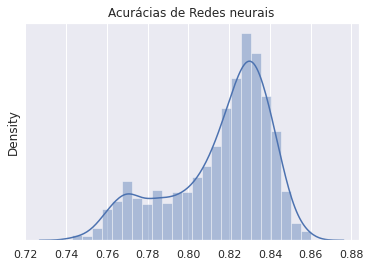

In [8]:
scores = []
for i in range(2000):
  X_train, X_test, y_train, y_test = train_test_split(X,y)
  modelrna = MLPClassifier()
  modelrna.fit(X_train, y_train)
  precisao = modelrna.score(X_test, y_test)
  scores.append(precisao)

print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))
sns.distplot(scores)
plt.yticks([])
plt.title("Acurácias de Redes neurais")
plt.show()

# KNN

In [9]:
modeloKNN = KNeighborsClassifier()
#Treinando o modelo utilizando o conjunto de treino
modeloKNN.fit(X_train, y_train)
#Validando o modelo utilizando o conjunto de teste
precisaoKNN_1 = str(round(modeloKNN.score(X_test,y_test)* 100, 2))+'%'
#Imprimindo o resultado
print("A acurácia do modelo K-NN foi",precisaoKNN_1)
#Predizendo o teste
y_pred = modeloKNN.predict(X_test)
#Comparando predição com o real
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

A acurácia do modelo K-NN foi 80.36%
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       923
         1.0       0.62      0.52      0.57       299

    accuracy                           0.80      1222
   macro avg       0.73      0.71      0.72      1222
weighted avg       0.79      0.80      0.80      1222



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 6, metric= 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [12]:
scoresKNN = []
x=0

for i in range(2000):
  X_train, X_test, y_train, y_test = train_test_split(X,y)
  modeloKNN = KNeighborsClassifier()
  modeloKNN.fit(X_train, y_train)
  precisaoKNN = modeloKNN.score(X_test, y_test)
  scoresKNN.append(precisaoKNN)


Média do KNN: 81.51%
Desvio padrão do KNN: 0.96%


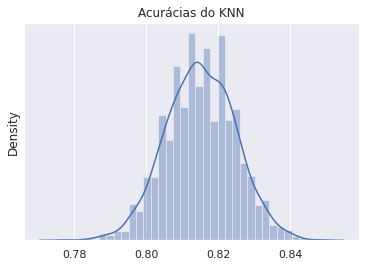

In [13]:
print("Média do KNN: {:.2f}%".format(np.mean(scoresKNN)*100))
print("Desvio padrão do KNN: {:.2f}%".format(np.std(scoresKNN)*100))
sns.distplot(scoresKNN)
plt.yticks([])
plt.title("Acurácias do KNN")
plt.show()

# Naive Bayes

In [14]:
#Cria um classificador Gaussiano
modeloNB = GaussianNB()
#Treinando o modelo usando os ajustes de treinamento
modeloNB.fit(X_train,y_train)
#Validando o modelo utilizando o conjunto de teste
precisaoNB = str(round(modeloNB.score(X_test,y_test) * 100, 2))+"%"
#imprimindo o resultado
print("A acurácia do modelo Naive Bayes foi", precisaoNB)
#Predizendo o teste
y_pred = modeloNB.predict(X_test)
#Comparando predição com o real

print(classification_report(y_test, y_pred))

A acurácia do modelo Naive Bayes foi 81.83%
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89       939
         1.0       0.79      0.30      0.43       283

    accuracy                           0.82      1222
   macro avg       0.80      0.64      0.66      1222
weighted avg       0.81      0.82      0.79      1222



In [42]:
scoresNB = []
for i in range(2000):
  X_train, X_test, y_train, y_test = train_test_split(X,y)
  modeloNB = GaussianNB()


  modeloNB.fit(X_train, y_train)
  precisaoNB = modeloNB.score(X_test, y_test)
  scoresNB.append(precisaoNB)


Média do Naive Bayes: 81.90%
Desvio padrão do Naive Bayes: 0.97%


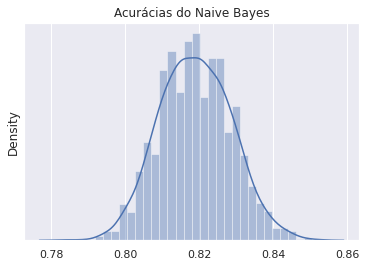

In [31]:
print("Média do Naive Bayes: {:.2f}%".format(np.mean(scoresNB)*100))
print("Desvio padrão do Naive Bayes: {:.2f}%".format(np.std(scoresNB)*100))
sns.distplot(scoresNB)
plt.yticks([])
plt.title("Acurácias do Naive Bayes")
plt.show()

#  Comitê


In [46]:
not_rec = 0
rec = 0
movie= [44749.0, 7200.0, 0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0]

pred_KNN = modeloKNN.predict([movie])
if pred_KNN == 0 :
  not_rec = not_rec + 1
  print('A IA KNN não recomenda este filme', pred_KNN)
else:
    rec = rec + 1
    print('A IA KNN recomenda este filme', pred_KNN)

pred_NB = modeloNB.predict([movie])
if pred_NB == 0 :
  not_rec = not_rec + 1
  print('A IA não Naive Bayes recomenda este filme', pred_NB)
else:
    rec = rec + 1
    print('A IA Naive Bayes recomenda este filme', pred_NB)

pred_rna = modelrna.predict([movie])
if pred_rna == 0 :
  not_rec = not_rec + 1
  print('A IA não Rede Neural recomenda este filme', pred_rna)
else:
    rec = rec + 1
    print('A IA Rede Neural recomenda este filme', pred_rna)

if rec >= 2:
  print("O filme é recomendado.")
else:
  print("O filme não é recomendado")


A IA KNN recomenda este filme [1.]
A IA não Naive Bayes recomenda este filme [0.]
A IA não Rede Neural recomenda este filme [0.]
O filme não é recomendado
